# Regression of linear and non-linear functions using neural networks with Tensorflow


Neural Networks have been used to solve some complicated problems in the last few years. One thing all those problems have in common, is that they all have strong non-linear features. 
The term linear means in one sense being related to lines. In terms of polynomials, it means the variables are all to the first degree.
Imagine that we are trying to create a model that will classify players in a football match, our model must classify each player as from team A, or from team B.
If our model were to be linear, we would have to draw a line in the field, then players from one side of the line would be from one team, and players on the other side would be from the other team.
Such a model would not be useful, it would work maybe only at the start of each match.


In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

print("tensorflow-gpu version ",tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

tensorflow-gpu version  1.12.0


First, we will see how a neural network with one layer and one neuron,  output = input*w1 + b fit the function y_values = 2*x_values. As the output is linear with the input, the optimizer shall not find it hard to find the values of w1 and b.

![neuron](https://user-images.githubusercontent.com/23335136/55291532-d0df6c80-53b5-11e9-89ad-4ee6fd04075c.png)

We need to create the traning data values

In [2]:
x_values = np.array([0, 1, 2, 3, 4,  5,  6],  dtype=float)
y_values = np.array([0, 2, 4, 6, 8, 10, 12],  dtype=float)

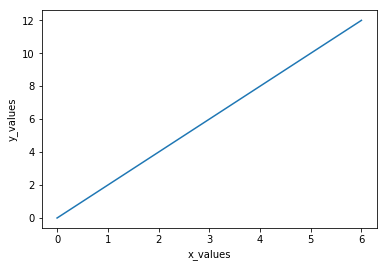

In [3]:
plt.plot(x_values,y_values)
plt.xlabel("x_values")
plt.ylabel("y_values")

plt.show()

Then we built the nn with keras

In [4]:
layer1 = tf.keras.layers.Dense(units=1,input_shape=[1])  
model = tf.keras.Sequential([layer1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


This network has 2 trainable parameters, one weight and one bias.
We will compile the network using the optimizer Adam to minimize the MSE. Adam can cause some trouble with sparse datasets as it uses momentum, but as we shall see, it will not be the case

In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

We will train the network for 500 epochs; this means that all values in the training set will fed to the network 500 times

In [6]:
history = model.fit(x_values, y_values, epochs=500, verbose=False)
print("These are the layer variables, w*x + b: {}".format(layer1.get_weights()))

These are the layer variables, w*x + b: [array([[2.]], dtype=float32), array([1.3719256e-11], dtype=float32)]


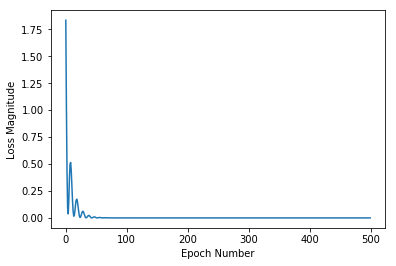

the loss in the last epoch is 0.00 


In [7]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()
print("the loss in the last epoch is %.2f " %history.history['loss'][499])

Let's test that. We will use data in the training set to evaluate the network just to get the graph. It is terribly wrong in data science or machine learning to evaluate models with training data. please don’t do that.

As we can see, after training, the network has the value 2.0 for its weight and -1.3E-11 for its bias, this close to the original function we were trying to fit


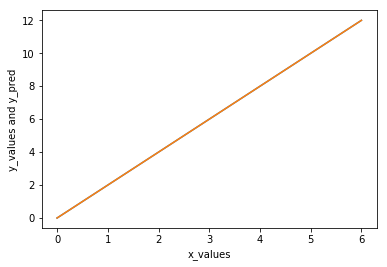

In [8]:
y_pred = np.array([int(model.predict([0])),
                   int(model.predict([1])),
                   int(model.predict([2])),
                   int(model.predict([3])),
                   int(model.predict([4])),
                   int(model.predict([5])),
                   int(model.predict([6]))],  dtype=float)

plt.plot(x_values,y_values)
plt.plot(x_values,y_pred)
plt.xlabel("x_values")
plt.ylabel("y_values and y_pred")

plt.show()

The two lines are soo close we can't see the two.

Now we will do the same with a quadratic function. As it is quadratic, we have no hope of fitting it with the network above, simple a*w1+b wont do. One thing we could try is to stack more layers in the network and use more units

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


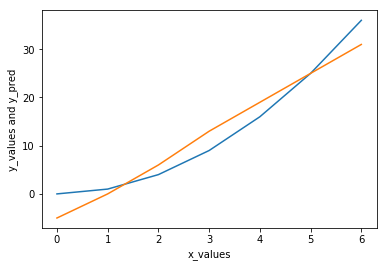

In [9]:
x_values = np.array([0, 1, 2, 3,  4,  5,  6],  dtype=float)
y_values = np.array([0, 1, 4, 9, 16, 25, 36],  dtype=float)

layer1 = tf.keras.layers.Dense(units=5,input_shape=[1])  
layer2 = tf.keras.layers.Dense(units=10) 
layer3 = tf.keras.layers.Dense(units=1) 

model = tf.keras.Sequential([layer1,layer2,layer3])
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x_values, y_values, epochs=100, verbose=False)
y_pred = np.array([int(model.predict([0])),
                   int(model.predict([1])),
                   int(model.predict([2])),
                   int(model.predict([3])),
                   int(model.predict([4])),
                   int(model.predict([5])),
                   int(model.predict([6]))],  dtype=float)

plt.plot(x_values,y_values)
plt.plot(x_values,y_pred)
plt.xlabel("x_values")
plt.ylabel("y_values and y_pred")

plt.show()

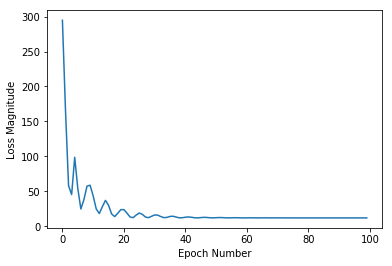

the loss in the last epoch is 12.00 


In [10]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()
print("the loss in the last epoch is %.2f " %history.history['loss'][99])

It didn't work, we got a linear model even with more layers. The superposition theorem tells us that the sum of two or more linear systems will always be linear. This is why we could use one unit to fit the first function but will not be able to fit the second, it does not matter how many neurons and layers we use, beucause it will still look something like y = a0*w0+a1*w1+... it will be linear.
To model non-linear functions, we need non-linearities.
The non-linearities are inserted in the neural network using activation-functions, relu and elu for instance

![act-funcs](https://user-images.githubusercontent.com/23335136/55291514-9f66a100-53b5-11e9-89a5-59566bdc9cc0.png)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


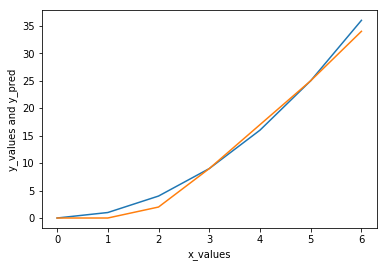

In [13]:
x_values = np.array([0, 1, 2, 3,  4,  5,  6],  dtype=float)
y_values = np.array([0, 1, 4, 9, 16, 25, 36],  dtype=float)

layer1 = tf.keras.layers.Dense(units=5,input_shape=[1],activation = 'elu')  
layer2 = tf.keras.layers.Dense(units=10,activation = 'elu') 
layer3 = tf.keras.layers.Dense(units=1,activation = 'elu') 

model = tf.keras.Sequential([layer1,layer2,layer3])
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x_values, y_values, epochs=100, verbose=False)
y_pred = np.array([int(model.predict([0])),
                   int(model.predict([1])),
                   int(model.predict([2])),
                   int(model.predict([3])),
                   int(model.predict([4])),
                   int(model.predict([5])),
                   int(model.predict([6]))],  dtype=float)

plt.plot(x_values,y_values)
plt.plot(x_values,y_pred)
plt.xlabel("x_values")
plt.ylabel("y_values and y_pred")

plt.show()

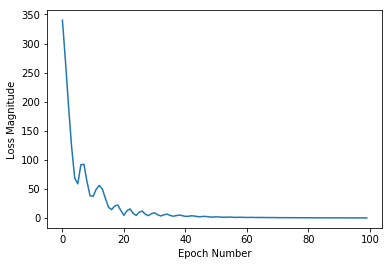

the loss in the last epoch is 0.12 


In [12]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()
print("the loss in the last epoch is %.2f " %history.history['loss'][99])

# Conclusion

In control systems, our professors are always saying things like 'everything real is non-linear', although we try our best to model systems with linear functions they are just approximations, and for complex systems, it gets harder and harder to model systems with linear functions because some of them have some really strong non-linearities. In data science and machine learning, we are trying to solve complex problems like classification and regression on non-linear data-sets, that’s why neural networks are the weapon of choice, and they approximate non-linear functions because of the non-linear activation functions.